We import essential libraries for data handling, visualization, and clustering.
We’ll also set a global plot style for consistent and clear visuals.

In [ ]:
# 📦 Block 1 — Import Libraries & Set Style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Better visualization
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (8,6)

print("✅ Libraries imported and style set successfully!")


✅ Libraries imported and style set successfully!


We’ll upload the dataset file and load only the first 100 rows for faster visualization and experimentation.

In [ ]:
# 📂 Block 2 — Load Dataset
from google.colab import files
import io

print("📁 Please upload your CSV dataset file...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=100)
print(f"✅ '{filename}' uploaded successfully and first 100 rows loaded!")
df.head()


📁 Please upload your CSV dataset file...


Saving weatherHistory.csv to weatherHistory.csv
✅ 'weatherHistory.csv' uploaded successfully and first 100 rows loaded!


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


We’ll select only numeric columns for clustering and standardize them so all features contribute equally.

In [ ]:
# 🔍 Block 3 — Data Preprocessing
df_numeric = df.select_dtypes(include=['float64','int64']).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print(f"✅ Selected {X_scaled.shape[1]} numeric features for clustering.")


✅ Selected 8 numeric features for clustering.


The Elbow Method helps find the optimal number of clusters (K) by plotting inertia (within-cluster sum of squares) vs K.
The “elbow point” indicates a balance between compactness and simplicity.

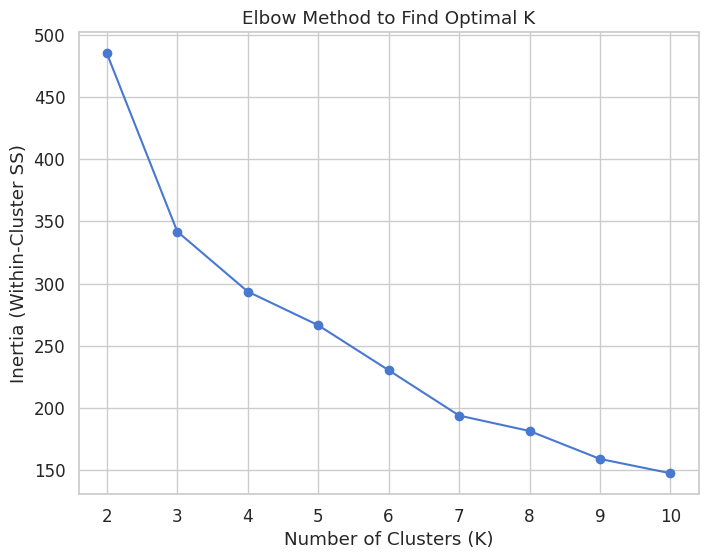

In [ ]:
# 📈 Block 4 — Elbow Method
inertia = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster SS)")
plt.title("Elbow Method to Find Optimal K")
plt.show()


The Silhouette Score measures how similar each sample is to its own cluster versus other clusters.
Higher values (closer to 1) indicate better clustering.

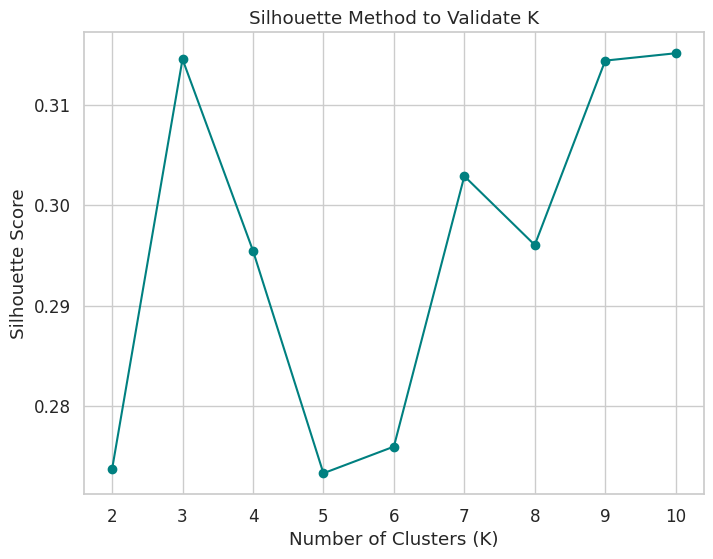

✅ Optimal K based on Silhouette Score = 10


In [ ]:
# 📊 Block 5 — Silhouette Analysis
sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.plot(K_range, sil_scores, marker='o', color='teal')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method to Validate K")
plt.show()

best_k = K_range[np.argmax(sil_scores)]
print(f"✅ Optimal K based on Silhouette Score = {best_k}")


We’ll fit the K-Means model using the optimal number of clusters found from the silhouette score.

In [ ]:
# ⚙️ Block 6 — Apply K-Means Clustering
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

df_numeric['Cluster'] = clusters
print("✅ K-Means clustering applied successfully!")


✅ K-Means clustering applied successfully!


We’ll reduce dimensionality using Principal Component Analysis (PCA) to visualize clusters in 2D.

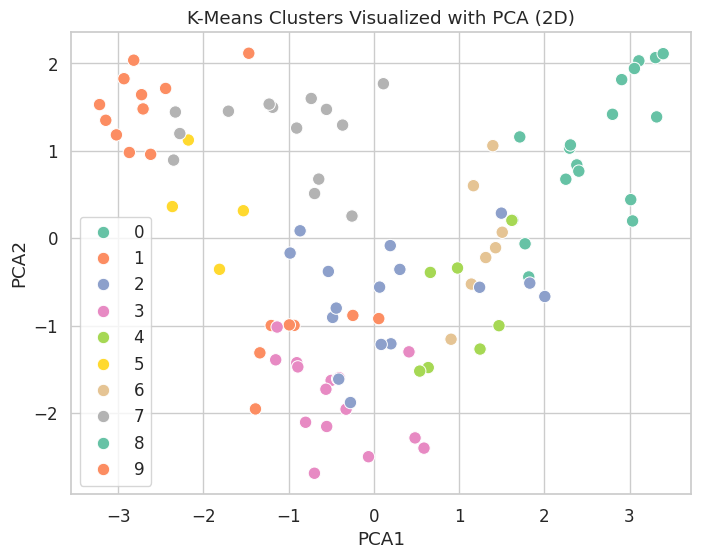

In [ ]:
# 🎨 Block 7 — PCA Reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1','PCA2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set2', s=80)
plt.title("K-Means Clusters Visualized with PCA (2D)")
plt.legend()
plt.show()


We’ll compute the mean profile of each cluster to understand its dominant feature patterns.

📋 Cluster Feature Summary:


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Cluster,,,,,,,,
0,19.283333,19.283333,0.437000,23.592940,165.600000,10.178420,0.0,1010.539000
1,7.773737,4.366667,0.940000,24.742773,339.545455,5.261773,0.0,1004.535455
2,12.378819,11.995486,0.796250,9.665031,108.625000,11.290125,0.0,1006.198750
3,8.364236,6.812153,0.805625,10.309031,226.562500,15.504300,0.0,1013.345000
4,13.031746,13.031746,0.710000,10.596100,169.857143,10.481100,0.0,1015.528571
5,7.769444,4.373611,0.915000,22.463525,15.000000,5.534375,0.0,1004.492500
6,14.076984,14.076984,0.611429,16.309300,185.285714,14.188700,0.0,1008.287143
7,10.192063,8.405159,0.756429,24.268450,332.071429,10.969850,0.0,1004.297857
8,17.127778,17.127778,0.553750,16.415962,275.875000,11.328363,0.0,1017.023750


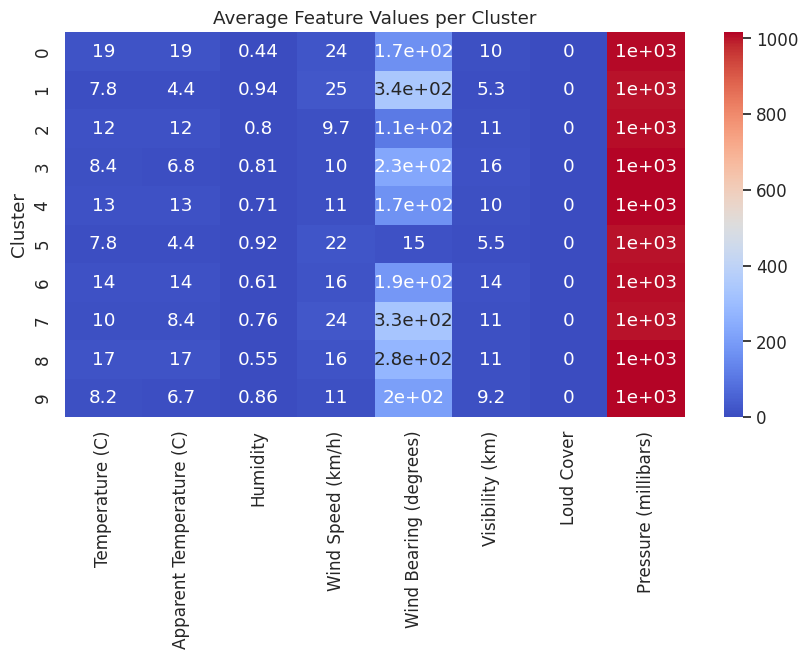

In [ ]:
# 📊 Block 8 — Cluster Characteristic Analysis
cluster_summary = df_numeric.groupby('Cluster').mean()
print("📋 Cluster Feature Summary:")
display(cluster_summary)

plt.figure(figsize=(10,5))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title("Average Feature Values per Cluster")
plt.show()


**K-Means Clustering Analysis**

In this study, K-Means groups similar data points into K clusters based on their feature patterns.
The Elbow Method shows where adding more clusters stops improving compactness, and the Silhouette Score quantifies cluster quality.
The PCA 2D plot displays how clusters are separated in lower-dimensional space, revealing natural patterns or overlaps.
Cluster-mean heatmaps show which features dominate each group — for example, one cluster might represent high-humidity, low-pressure days while another shows low-humidity, clear-visibility conditions.
We use K-Means here to discover inherent (unsupervised) structure in data, revealing natural groupings without any prior labels, which helps in pattern discovery, segmentation, and data insight generation.